## Part 1
## Digit Classification Model

In this Section :-
- Loading the dataset.
- Splitting the dataset into Training and Validation Set.
- Preprocessing the dataset.
- Model building and Training.

### Loading the dataset.
The dataset of images is used for building a suitable model to classify numbers in an image. Data is then specified as features(the image) and labels(the tags).

In [1]:
##### Importing required libraries #####
import os
import numpy as np
import pandas as pd
import cv2

## Importing the dataset from kaggle

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gaur2025","key":"9697d2ba34f8474f8fa12d510afc9285"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
# !kaggle datasets list
!kaggle datasets download -d karnikakapoor/digits   
!unzip digits.zip


Streaming output truncated to the last 5000 lines.
  inflating: Digits/5/img006-00081.png  
  inflating: Digits/5/img006-00082.png  
  inflating: Digits/5/img006-00083.png  
  inflating: Digits/5/img006-00084.png  
  inflating: Digits/5/img006-00085.png  
  inflating: Digits/5/img006-00086.png  
  inflating: Digits/5/img006-00087.png  
  inflating: Digits/5/img006-00088.png  
  inflating: Digits/5/img006-00089.png  
  inflating: Digits/5/img006-00090.png  
  inflating: Digits/5/img006-00091.png  
  inflating: Digits/5/img006-00092.png  
  inflating: Digits/5/img006-00093.png  
  inflating: Digits/5/img006-00094.png  
  inflating: Digits/5/img006-00095.png  
  inflating: Digits/5/img006-00096.png  
  inflating: Digits/5/img006-00097.png  
  inflating: Digits/5/img006-00098.png  
  inflating: Digits/5/img006-00099.png  
  inflating: Digits/5/img006-00100.png  
  inflating: Digits/5/img006-00101.png  
  inflating: Digits/5/img006-00102.png  
  inflating: Digits/5/img006-00103.png  
  infl

### Initial preprocessing

In [5]:
data = os.listdir(r"/content/Digits")

data_X = []
data_y = []

data_classes = len(data)  # This is no. of sub-directories in Digits directory. i.e. 10

for i in range(0, data_classes):
    data_list = os.listdir(r"/content/Digits" + "/" + str(i))
    
    for j in data_list:
        # Reading all the images using cv2.
        pic = cv2.imread(r"/content/Digits" + "/" + str(i) + "/" + j)
        pic = cv2.resize(pic ,(32, 32))
        data_X.append(pic)  # Creating features.
        data_y.append(i)
                           


In [6]:
if len(data_X) == len(data_y):
    print(f"Total datapoints: {len(data_X)}" )
    
# Labels and images.
data_X = np.array(data_X)
data_y = np.array(data_y)

Total datapoints: 10160


### Splitting the dataset.
1. Splitting the dataset into test, train and validation sets. 
2. Preprocessing for the features (images) into grayscale, enhancing it with histogram equalization and then normalizing.
3. Followed by converting then into a NumPy array. 
4. Further reshaping the image's array and using data augmentation. 
5. Preprocessing for the labels involves one-hot encoding the label classes

In [7]:
# 1. Splitting into train, test and validation set.
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size = 0.05)
train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size = 0.2)

print(f"Training set shape: {train_X.shape}")
print(f"Validation set shape: {valid_X.shape}")
print(f"Test set shape: {test_X.shape}")

Training set shape: (7721, 32, 32, 3)
Validation set shape: (1931, 32, 32, 3)
Test set shape: (508, 32, 32, 3)


In [8]:
# 2. Preprocessing the images for the neural net.
def Prep(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Making image grayscale for easy preprocessing.
    img = cv2.equalizeHist(img) # Histogram equalization to improve contrast.
    img = img / 255  # Normalizing.
    return img

In [9]:
# 3. Converting images into numpy arrays.
train_X = np.array(list(map(Prep, train_X)))
valid_X = np.array(list(map(Prep, valid_X)))
test_X = np.array(list(map(Prep, test_X)))

In [10]:
# 4. Reshaping the images.
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2], 1)
valid_X = valid_X.reshape(valid_X.shape[0], valid_X.shape[1], valid_X.shape[2], 1)
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2], 1)

In [11]:
# 5. Image augmentation. (Manipulating structure of image as required.)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1,
                             zoom_range = 0.2, shear_range = 0.1, rotation_range = 10)
datagen.fit(train_X)

In [12]:
# 6. One-hot encoding of the labels.
from keras.utils.np_utils import to_categorical
train_y = to_categorical(train_y, data_classes)
valid_y = to_categorical(valid_y, data_classes)
test_y = to_categorical(test_y, data_classes)


## Model Building.
**Creating a Convolutional Neural Network for the model.**
- Initializing the Convnet.
- Defining by adding layers.
- Compiling the Convnet.
- Train the Convnet.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
model = Sequential()

model.add((Conv2D(60, (5, 5), input_shape = (32, 32, 1), padding = 'Same', activation = 'relu')))
model.add((Conv2D(60, (5, 5), padding = 'Same', activation = 'relu')))
model.add(MaxPooling2D(pool_size = (2, 2)))
# model.add(Dropout(0.25))

model.add((Conv2D(30, (3,3),padding="same", activation='relu')))
model.add((Conv2D(30, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 30)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 30)          0

In [14]:
# Compiling the model.
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate = 0.001, rho = 0.9, epsilon = 1e-08, decay = 0.0)

model.compile(optimizer = optimizer,
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

# Fitting the model.
history = model.fit(datagen.flow(train_X, train_y, batch_size = 32),
                                 epochs = 30, validation_data = (valid_X, valid_y),
                                 verbose = 2, steps_per_epoch = 200)

Epoch 1/30
200/200 - 35s - loss: 1.1367 - accuracy: 0.5970 - val_loss: 0.1330 - val_accuracy: 0.9549
Epoch 2/30
200/200 - 2s - loss: 0.2992 - accuracy: 0.9017 - val_loss: 0.0538 - val_accuracy: 0.9824
Epoch 3/30
200/200 - 2s - loss: 0.2016 - accuracy: 0.9368 - val_loss: 0.0507 - val_accuracy: 0.9834
Epoch 4/30
200/200 - 2s - loss: 0.1606 - accuracy: 0.9484 - val_loss: 0.0302 - val_accuracy: 0.9896
Epoch 5/30
200/200 - 2s - loss: 0.1466 - accuracy: 0.9547 - val_loss: 0.0270 - val_accuracy: 0.9902
Epoch 6/30
200/200 - 2s - loss: 0.1248 - accuracy: 0.9621 - val_loss: 0.0296 - val_accuracy: 0.9912
Epoch 7/30
200/200 - 2s - loss: 0.1093 - accuracy: 0.9677 - val_loss: 0.0257 - val_accuracy: 0.9922
Epoch 8/30
200/200 - 2s - loss: 0.1086 - accuracy: 0.9675 - val_loss: 0.0182 - val_accuracy: 0.9938
Epoch 9/30
200/200 - 2s - loss: 0.1038 - accuracy: 0.9674 - val_loss: 0.0222 - val_accuracy: 0.9943
Epoch 10/30
200/200 - 2s - loss: 0.1019 - accuracy: 0.9708 - val_loss: 0.0196 - val_accuracy: 0.993

### Testing the model on the test set.


In [15]:
score = model.evaluate(test_X, test_y, verbose = 0)
print(f"Test Score is {score[0]}")
print(f"Test Accuracy is {score[1]}")


Test Score is 0.012513984926044941
Test Accuracy is 0.9960629940032959


# Part 2
## Reading the Sudoku puzzle.

- Effective reading the image from the dataset.
- Preprocessing of image.

In [16]:
! kaggle datasets download -d macfooty/sudoku-box-detection

 90% 107M/118M [00:00<00:00, 92.4MB/s] 
100% 118M/118M [00:01<00:00, 114MB/s] 


In [17]:
! unzip sudoku-box-detection.zip

Archive:  sudoku-box-detection.zip
  inflating: aug/_0_1018787.jpeg     
  inflating: aug/_0_1436352.jpeg     
  inflating: aug/_0_1687235.jpeg     
  inflating: aug/_0_3815548.jpeg     
  inflating: aug/_0_6290258.jpeg     
  inflating: aug/_0_6580185.jpeg     
  inflating: aug/_0_7427031.jpeg     
  inflating: aug/_0_7670549.jpeg     
  inflating: aug/_0_7804667.jpeg     
  inflating: aug/_0_8213354.jpeg     
  inflating: aug/_0_8253634.jpeg     
  inflating: aug/_0_9108897.jpeg     
  inflating: aug/_0_9159144.jpeg     
  inflating: aug/_0_9170704.jpeg     
  inflating: aug/_0_926439.jpeg      
  inflating: aug/_0_9607135.jpeg     
  inflating: aug/_100_2605002.jpeg   
  inflating: aug/_100_269740.jpeg    
  inflating: aug/_100_2756839.jpeg   
  inflating: aug/_100_3394881.jpeg   
  inflating: aug/_100_3511539.jpeg   
  inflating: aug/_100_4270930.jpeg   
  inflating: aug/_100_5064037.jpeg   
  inflating: aug/_100_5116008.jpeg   
  inflating: aug/_100_5500090.jpeg   
  inflating: au

_289_712884.jpeg


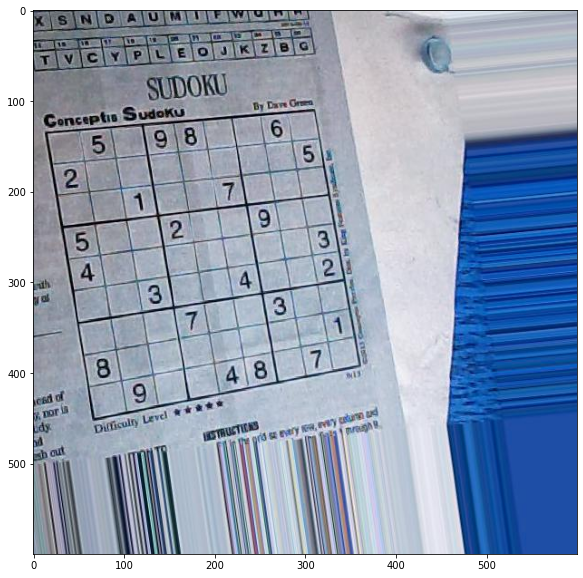

In [18]:
# Randomly selecting an image from the dataset.

import random
import matplotlib.pyplot as plt

folder = r"/content/aug"

a = random.choice(os.listdir(folder))
print(a)

sudoku_a = cv2.imread(folder + '/' + a)

plt.figure(figsize = (10, 10))
plt.imshow(sudoku_a)
plt.show()


In [20]:
# Preprocessing image to be saved.
sudoku_a = cv2.resize(sudoku_a, (450, 450))

def preprocess(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (3, 3), 6)
  # blur = cv2.bilateralFilter(gray, 9, 75, 75)
  threshold_img = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
  return threshold_img

threshold = preprocess(sudoku_a)

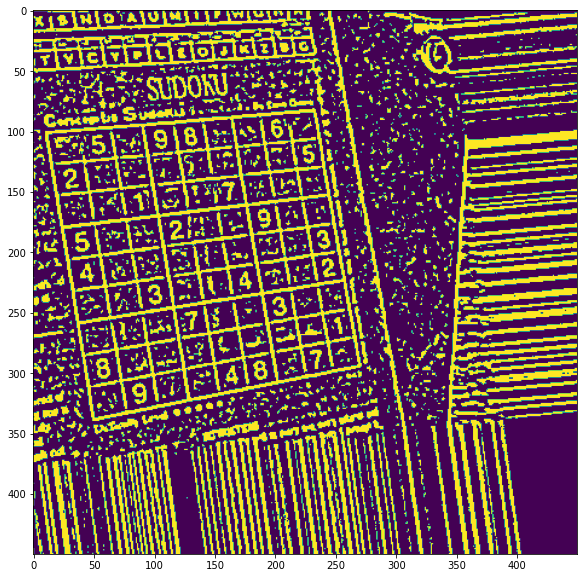

In [21]:
# Lets look at preprocessed image above.
plt.figure(figsize = (10, 10))
plt.imshow(threshold)
plt.show()

### Detecting Contours.
- Detect the contour of the image.
- Reshaping the outline to get the cropped and well-aligned Sudoku.

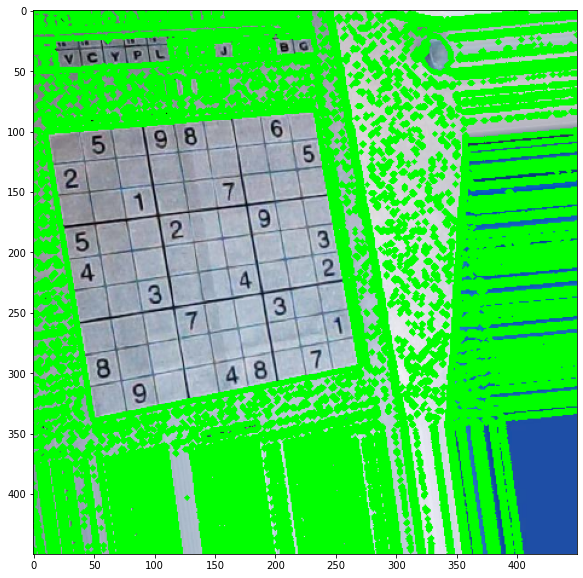

In [22]:
# Finding the outline of the sudoku puzzle in the image.
contour_1 = sudoku_a.copy()
contour_2 = sudoku_a.copy()

contour, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1, contour, -1, (0, 255, 0), 3)



# Lets look at preprocessed image above.
plt.figure(figsize = (10, 10))
plt.imshow(contour_1)
plt.show()

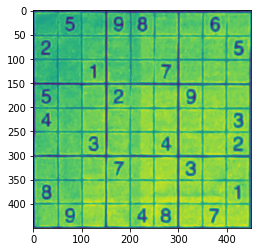

In [36]:
def main_outline(contour):
  biggest = np.array([])
  max_area = 0

  for i in contour:
    area = cv2.contourArea(i)
    if area > 50:
      peri = cv2.arcLength(i, True)  # Perimeter
      approx = cv2.approxPolyDP(i, 0.02 * peri, True)
      if area > max_area and len(approx) == 4:
        biggest = approx
        max_area = area
  return biggest, max_area

def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4,1,2),dtype = np.int32)
    add = points.sum(1)
    points_new[0] = points[np.argmin(add)]
    points_new[3] = points[np.argmax(add)]
    diff = np.diff(points, axis =1)
    points_new[1] = points[np.argmin(diff)]
    points_new[2] = points[np.argmax(diff)]
    return points_new

def splitcells(img):
    rows = np.vsplit(img,9)
    boxes = []
    for r in rows:
        cols = np.hsplit(r,9)
        for box in cols:
            boxes.append(box)
    return boxes


black_img = np.zeros((450,450,3), np.uint8)
biggest, maxArea = main_outline(contour)
if biggest.size != 0:
    biggest = reframe(biggest)
    cv2.drawContours(contour_2,biggest,-1, (0,255,0),10)
    pts1 = np.float32(biggest)
    pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
    matrix = cv2.getPerspectiveTransform(pts1,pts2)  
    imagewrap = cv2.warpPerspective(sudoku_a,matrix,(450,450))
    imagewrap =cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)
    
plt.figure()
plt.imshow(imagewrap)
plt.show()



    


Our goal till now is completed. We are able to find sudoku from a picture.

# Part:- 3
## Soving the SUDOKU

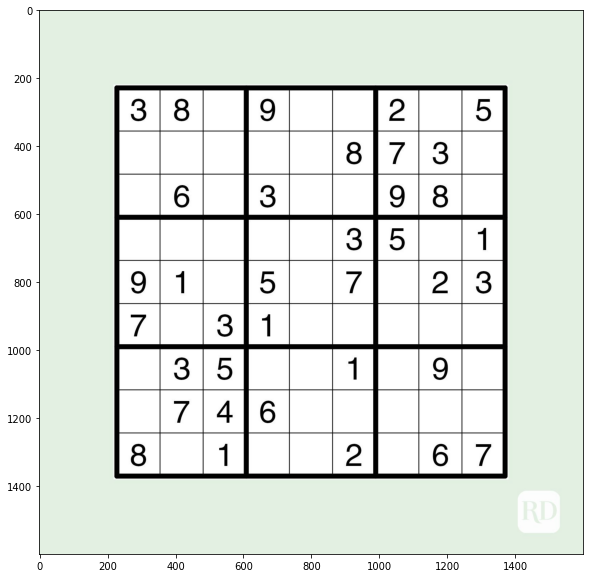

In [37]:
# Importing top sudoku to be solved.
puzzle = cv2.imread('/content/su.jpg')

plt.figure(figsize = (10, 10))
plt.imshow(puzzle)
plt.show()

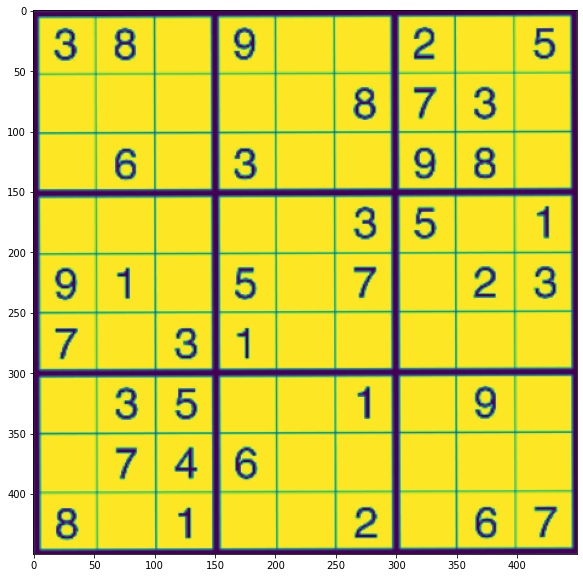

In [38]:
# Resizing sudoku to be solved.
# Actually doing all the preprocessing as above.

puzzle = cv2.resize(puzzle, (450,450))
# Preprocessing Puzzle 
su_puzzle = preprocess(puzzle)

# Finding the outline of the sudoku puzzle in the image
su_contour_1= su_puzzle.copy()
su_contour_2= sudoku_a.copy()
su_contour, hierarchy = cv2.findContours(su_puzzle,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(su_contour_1, su_contour,-1,(0,255,0),3)

black_img = np.zeros((450,450,3), np.uint8)
su_biggest, su_maxArea = main_outline(su_contour)
if su_biggest.size != 0:
    su_biggest = reframe(su_biggest)
    cv2.drawContours(su_contour_2,su_biggest,-1, (0,255,0),10)
    su_pts1 = np.float32(su_biggest)
    su_pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
    su_matrix = cv2.getPerspectiveTransform(su_pts1,su_pts2)  
    su_imagewrap = cv2.warpPerspective(puzzle,su_matrix,(450,450))
    su_imagewrap =cv2.cvtColor(su_imagewrap, cv2.COLOR_BGR2GRAY)
    
plt.figure(figsize = (10, 10))
plt.imshow(su_imagewrap)
plt.show()

## Splitting the digits and classifying the digits
1. Splitting the Sudoku box into 81 cells with empty spaces or digits.
2. Cropping the cells to avoid misdetection of boundary lines as digits.
3. Using the model to classify the digits in the cells such that the empty cells are classified as zero.
4. Getting the detected output in the form of an array of 81 digits.

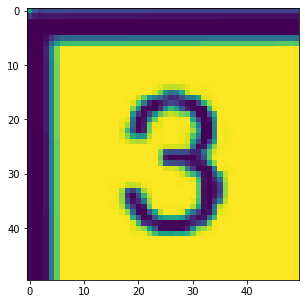

In [40]:
# 1
sudoku_cell = splitcells(su_imagewrap)

# Lets have a look at one(first) of the cells.
plt.figure(figsize = (5, 5))
plt.imshow(sudoku_cell[0])
plt.show()

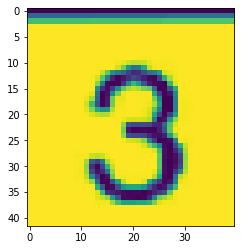

In [44]:
# The sudoku_cell's output includes the boundaries this could lead to misclassifications by the model 
# I am cropping the cells to avoid that
# sneeking in a bit of PIL lib as cv2 was giving some weird error that i couldn't ward off
from PIL import Image 

def CropCell(cells):
    Cells_croped = []
    for image in cells:
        
        img = np.array(image)
        img = img[4:46, 6:46]
        img = Image.fromarray(img)
        Cells_croped.append(img)
        
    return Cells_croped

sudoku_cell_croped= CropCell(sudoku_cell)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell_croped[0])
plt.show()

In [45]:
def read_cells(cell,model):

    result = []
    for image in cell:
        # preprocess the image as it was in the model 
        img = np.asarray(image)
        img = img[4:img.shape[0] - 4, 4:img.shape[1] -4]
        img = cv2.resize(img, (32, 32))
        img = img / 255
        img = img.reshape(1, 32, 32, 1)
        # getting predictions and setting the values if probabilities are above 65% 
        
        predictions = model.predict(img)
        classIndex = model.predict_classes(img)
        probabilityValue = np.amax(predictions)
        
        if probabilityValue > 0.65:
            result.append(classIndex[0])
        else:
            result.append(0)
    return result

grid = read_cells(sudoku_cell_croped, model)
grid = np.asarray(grid)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## Solving SUDOKU Now
- Reshaping the array into a 9 x 9 matrix
- Solving the matrix using recursion

In [46]:
# Reshaping the grid to a 9x9 matrix

grid = np.reshape(grid,(9,9))
grid

array([[3, 8, 0, 9, 0, 0, 2, 0, 5],
       [0, 0, 0, 0, 0, 8, 7, 3, 0],
       [0, 6, 0, 3, 0, 0, 9, 8, 0],
       [0, 0, 0, 0, 0, 3, 5, 0, 1],
       [9, 1, 0, 5, 0, 7, 0, 2, 3],
       [7, 0, 3, 1, 0, 0, 0, 0, 0],
       [0, 3, 5, 0, 0, 1, 0, 9, 0],
       [0, 7, 4, 6, 0, 0, 0, 0, 0],
       [8, 0, 1, 0, 0, 2, 0, 6, 7]])

Some numbers may be missing as it may be due to the classification probabilities may be below 65%. It could lead to more than one solution. I am just going with it.

P.S. Adding an arbitrary number could lead to a puzzle with no solution. Whereas, removing numbers increase the combinations.

In [47]:
#This function finds the next box to solve 

def next_box(quiz):
    for row in range(9):
        for col in range(9):
            if quiz[row][col] == 0:
                return (row, col)
    return False

#Function to fill in the possible values by evaluating rows collumns and smaller cells

def possible (quiz,row, col, n):
    #global quiz
    for i in range (0,9):
        if quiz[row][i] == n and row != i:
            return False
    for i in range (0,9):
        if quiz[i][col] == n and col != i:
            return False
        
    row0 = (row)//3
    col0 = (col)//3
    for i in range(row0*3, row0*3 + 3):
        for j in range(col0*3, col0*3 + 3):
            if quiz[i][j]==n and (i,j) != (row, col):
                return False
    return True

#Recursion function to loop over untill a valid answer is found. 

def solve(quiz):
    val = next_box(quiz)
    if val is False:
        return True
    else:
        row, col = val
        for n in range(1,10): #n is the possible solution
            if possible(quiz,row, col, n):
                quiz[row][col]=n
                if solve(quiz):
                    return True 
                else:
                    quiz[row][col]=0
        return 
    
def Solved(quiz):
    for row in range(9):
        if row % 3 == 0 and row != 0:
            print("....................")

        for col in range(9):
            if col % 3 == 0 and col != 0:
                print("|", end=" ")

            if col == 8:
                print(quiz[row][col])
            else:
                print(str(quiz[row][col]) + " ", end="")
                

In [48]:
solve(grid)

True

In [49]:
if solve(grid):
    Solved(grid)
else:
    print("Solution don't exist. Model misread digits.")

3 8 7 | 9 4 6 | 2 1 5
5 4 9 | 2 1 8 | 7 3 6
1 6 2 | 3 7 5 | 9 8 4
....................
4 2 6 | 8 9 3 | 5 7 1
9 1 8 | 5 6 7 | 6 2 3
7 5 3 | 1 2 4 | 8 4 9
....................
6 3 5 | 7 8 1 | 4 9 2
2 7 4 | 6 3 9 | 1 5 8
8 9 1 | 4 5 2 | 3 6 7


## Sudoku Solved.